In [1]:
reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [2]:
# Basic lib imports
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import collections
from scipy import stats
import seaborn as sns
import pickle
import seaborn as sns
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import linkage
import math
from scipy.stats import zscore
%matplotlib inline

In [5]:
# AAL 
clinData = pd.read_csv('SAPSnSANS_data_final_getridofmissingdata.csv')
demo_thickData = pd.read_csv('mergedData_wOut_duplicates_final.csv')

# vertex
# clinData = pd.read_csv('SAPSnSANS_data_final_getridofmissingdata_2.csv')
# demo_thickData = pd.read_csv('all_vertex_thickness_data_wOut_duplicates.csv')

print(clinData.shape)
print(demo_thickData.shape)

(198, 62)
(229, 262)


In [6]:
print(clinData.shape)
print(demo_thickData.shape)
# print(demo_thickData[demo_thickData[u'dataset']=='NMorph']['subjectid'].shape[0])
# print(demo_thickData[demo_thickData[u'dataset']=='fBIRN']['subjectid'].shape[0])
# print(demo_thickData[demo_thickData[u'dataset']=='NUSDAST']['subjectid'].shape[0])
# print(clinData[clinData[u'dataset']=='NMorph']['subjectid'].shape[0])
# print(clinData[clinData[u'dataset']=='fBIRN']['subjectid'].shape[0])
# print(clinData[clinData[u'dataset']=='NUSDAST']['subjectid'].shape[0])

(198, 62)
(229, 262)


In [7]:
# AAL
common = clinData.merge(demo_thickData,on=['subjectid'])
common.rename(columns={'dataset_y': 'dataset'}, inplace=True)
clinData = common[['subjectid', 'sans1', 'sans2', 'sans3', 'sans4', 'sans5', 'sans6', 'sans7', 'sans8', 'sans9', 'sans10', 'sans11', 'sans12', 'sans13', 'sans14', 'sans15', 'sans16', 'sans17', 'sans18', 'sans19', 'sans20', 'sans21', 'sans22', 'sans23', 'sans24', 'sans25', 'saps1', 'saps2', 'saps3', 'saps4', 'saps5', 'saps6', 'saps7', 'saps8', 'saps9', 'saps10', 'saps11', 'saps12', 'saps13', 'saps14', 'saps15', 'saps16', 'saps17', 'saps18', 'saps19', 'saps20', 'saps21', 'saps22', 'saps23', 'saps24', 'saps25', 'saps26', 'saps27', 'saps28', 'saps29', 'saps30', 'saps31', 'saps32', 'saps33', 'saps34', 'dataset']]
demo_thickData = common[['PreCG.L_SA', 'SFGdor.L_SA', 'ORBsup.L_SA', 'MFG.L_SA', 'ORBmid.L_SA', 'IFGoperc.L_SA', 'IFGtriang.L_SA', 'ORBinf.L_SA', 'ROL.L_SA', 'SMA.L_SA', 'OLF.L_SA', 'SFGmed.L_SA', 'ORBsupmed.L_SA', 'REC.L_SA', 'INS.L_SA', 'ACG.L_SA', 'DCG.L_SA', 'PCG.L_SA', 'PHG.L_SA', 'CAL.L_SA', 'CUN.L_SA', 'LING.L_SA', 'SOG.L_SA', 'MOG.L_SA', 'IOG.L_SA', 'FFG.L_SA', 'PoCG.L_SA', 'SPG.L_SA', 'IPL.L_SA', 'SMG.L_SA', 'ANG.L_SA', 'PCUN.L_SA', 'PCL.L_SA', 'HES.L_SA', 'STG.L_SA', 'TPOsup.L_SA', 'MTG.L_SA', 'TPOmid.L_SA', 'ITG.L_SA', 'Total.L_SA', 'PreCG.R_SA', 'SFGdor.R_SA', 'ORBsup.R_SA', 'MFG.R_SA', 'ORBmid.R_SA', 'IFGoperc.R_SA', 'IFGtriang.R_SA', 'ORBinf.R_SA', 'ROL.R_SA', 'SMA.R_SA', 'OLF.R_SA', 'SFGmed.R_SA', 'ORBsupmed.R_SA', 'REC.R_SA', 'INS.R_SA', 'ACG.R_SA', 'DCG.R_SA', 'PCG.R_SA', 'PHG.R_SA', 'CAL.R_SA', 'CUN.R_SA', 'LING.R_SA', 'SOG.R_SA', 'MOG.R_SA', 'IOG.R_SA', 'FFG.R_SA', 'PoCG.R_SA', 'SPG.R_SA', 'IPL.R_SA', 'SMG.R_SA', 'ANG.R_SA', 'PCUN.R_SA', 'PCL.R_SA', 'HES.R_SA', 'STG.R_SA', 'TPOsup.R_SA', 'MTG.R_SA', 'TPOmid.R_SA', 'ITG.R_SA', 'Total.R_SA', 'PreCG.L_CT', 'SFGdor.L_CT', 'ORBsup.L_CT', 'MFG.L_CT', 'ORBmid.L_CT', 'IFGoperc.L_CT', 'IFGtriang.L_CT', 'ORBinf.L_CT', 'ROL.L_CT', 'SMA.L_CT', 'OLF.L_CT', 'SFGmed.L_CT', 'ORBsupmed.L_CT', 'REC.L_CT', 'INS.L_CT', 'ACG.L_CT', 'DCG.L_CT', 'PCG.L_CT', 'PHG.L_CT', 'CAL.L_CT', 'CUN.L_CT', 'LING.L_CT', 'SOG.L_CT', 'MOG.L_CT', 'IOG.L_CT', 'FFG.L_CT', 'PoCG.L_CT', 'SPG.L_CT', 'IPL.L_CT', 'SMG.L_CT', 'ANG.L_CT', 'PCUN.L_CT', 'PCL.L_CT', 'HES.L_CT', 'STG.L_CT', 'TPOsup.L_CT', 'MTG.L_CT', 'TPOmid.L_CT', 'ITG.L_CT', 'Mean.L_CT', 'PreCG.R_CT', 'SFGdor.R_CT', 'ORBsup.R_CT', 'MFG.R_CT', 'ORBmid.R_CT', 'IFGoperc.R_CT', 'IFGtriang.R_CT', 'ORBinf.R_CT', 'ROL.R_CT', 'SMA.R_CT', 'OLF.R_CT', 'SFGmed.R_CT', 'ORBsupmed.R_CT', 'REC.R_CT', 'INS.R_CT', 'ACG.R_CT', 'DCG.R_CT', 'PCG.R_CT', 'PHG.R_CT', 'CAL.R_CT', 'CUN.R_CT', 'LING.R_CT', 'SOG.R_CT', 'MOG.R_CT', 'IOG.R_CT', 'FFG.R_CT', 'PoCG.R_CT', 'SPG.R_CT', 'IPL.R_CT', 'SMG.R_CT', 'ANG.R_CT', 'PCUN.R_CT', 'PCL.R_CT', 'HES.R_CT', 'STG.R_CT', 'TPOsup.R_CT', 'MTG.R_CT', 'TPOmid.R_CT', 'ITG.R_CT', 'Mean.R_CT', 'PreCG.L_CV', 'SFGdor.L_CV', 'ORBsup.L_CV', 'MFG.L_CV', 'ORBmid.L_CV', 'IFGoperc.L_CV', 'IFGtriang.L_CV', 'ORBinf.L_CV', 'ROL.L_CV', 'SMA.L_CV', 'OLF.L_CV', 'SFGmed.L_CV', 'ORBsupmed.L_CV', 'REC.L_CV', 'INS.L_CV', 'ACG.L_CV', 'DCG.L_CV', 'PCG.L_CV', 'PHG.L_CV', 'CAL.L_CV', 'CUN.L_CV', 'LING.L_CV', 'SOG.L_CV', 'MOG.L_CV', 'IOG.L_CV', 'FFG.L_CV', 'PoCG.L_CV', 'SPG.L_CV', 'IPL.L_CV', 'SMG.L_CV', 'ANG.L_CV', 'PCUN.L_CV', 'PCL.L_CV', 'HES.L_CV', 'STG.L_CV', 'TPOsup.L_CV', 'MTG.L_CV', 'TPOmid.L_CV', 'ITG.L_CV', 'Total.L_CV', 'PreCG.R_CV', 'SFGdor.R_CV', 'ORBsup.R_CV', 'MFG.R_CV', 'ORBmid.R_CV', 'IFGoperc.R_CV', 'IFGtriang.R_CV', 'ORBinf.R_CV', 'ROL.R_CV', 'SMA.R_CV', 'OLF.R_CV', 'SFGmed.R_CV', 'ORBsupmed.R_CV', 'REC.R_CV', 'INS.R_CV', 'ACG.R_CV', 'DCG.R_CV', 'PCG.R_CV', 'PHG.R_CV', 'CAL.R_CV', 'CUN.R_CV', 'LING.R_CV', 'SOG.R_CV', 'MOG.R_CV', 'IOG.R_CV', 'FFG.R_CV', 'PoCG.R_CV', 'SPG.R_CV', 'IPL.R_CV', 'SMG.R_CV', 'ANG.R_CV', 'PCUN.R_CV', 'PCL.R_CV', 'HES.R_CV', 'STG.R_CV', 'TPOsup.R_CV', 'MTG.R_CV', 'TPOmid.R_CV', 'ITG.R_CV', 'Total.R_CV', 'subjectid', 'dataset', 'study', 'age', 'sex', 'dx', 'field_strength', 'img_date', 'datauri', 'maker', 'model', 'szc_protocol_hier', 'notes', 'imaging_protocol_site', 'visit', 'assessment_description', 'assessment', 'assessment_site', 'id', 'QC']]

In [8]:
# vertex
# fixNMorphSubjectID = pd.DataFrame()
# for i in range(demo_thickData[demo_thickData[u'dataset']=='NMorph']['subjectid'].shape[0]):
#     b = demo_thickData[demo_thickData[u'dataset']=='NMorph']['subjectid'].iloc[i]
#     c = b[:2].upper() + b[2:].lower()
#     new_record = pd.DataFrame([[c]],columns=['new_subjectid'])
#     fixNMorphSubjectID = pd.concat([fixNMorphSubjectID,new_record], ignore_index=True)
# print(fixNMorphSubjectID.shape)
# print(demo_thickData[demo_thickData[u'dataset']=='NMorph']['subjectid'].shape)

# fixfBIRNSubjectID = pd.DataFrame()
# for i in range(demo_thickData[demo_thickData[u'dataset']=='fBIRN']['subjectid'].shape[0]):
#     b = demo_thickData[demo_thickData[u'dataset']=='fBIRN']['subjectid'].iloc[i]
#     c = str(b)
# #     c = str(b).zfill(12)
#     new_record = pd.DataFrame([[c]],columns=['new_subjectid'])
#     fixfBIRNSubjectID = pd.concat([fixfBIRNSubjectID,new_record], ignore_index=True)
# print(demo_thickData[demo_thickData[u'dataset']=='fBIRN']['subjectid'].shape)
# print(fixfBIRNSubjectID.shape)

# fixNUSDASTSubjectID = pd.DataFrame()
# for i in range(demo_thickData[demo_thickData[u'dataset']=='NUSDAST']['subjectid'].shape[0]):
#     b = demo_thickData[demo_thickData[u'dataset']=='NUSDAST']['subjectid'].iloc[i]
#     c = str(b)
# #     c = str(b).zfill(12)
#     new_record = pd.DataFrame([[c]],columns=['new_subjectid'])
#     fixNUSDASTSubjectID = pd.concat([fixNUSDASTSubjectID,new_record], ignore_index=True)
# print(demo_thickData[demo_thickData[u'dataset']=='NUSDAST']['subjectid'].shape)
# print(fixNUSDASTSubjectID.shape)

# new_subjectids = pd.concat([fixfBIRNSubjectID['new_subjectid'],fixNMorphSubjectID['new_subjectid'],fixNUSDASTSubjectID['new_subjectid']],ignore_index=True)
# new_subjectids.shape

# demo_thickData.drop('subjectid', axis=1)
# print(demo_thickData.shape)

# demo_thickData['subjectid']=new_subjectids

# common = clinData.merge(demo_thickData,on=['subjectid'])

In [9]:
# vertex
# common.rename(columns={'dataset_y': 'dataset'}, inplace=True)
# clinData = common[['subjectid', 'sans1', 'sans2', 'sans3', 'sans4', 'sans5', 'sans6', 'sans7', 'sans8', 'sans9', 'sans10', 'sans11', 'sans12', 'sans13', 'sans14', 'sans15', 'sans16', 'sans17', 'sans18', 'sans19', 'sans20', 'sans21', 'sans22', 'sans23', 'sans24', 'sans25', 'saps1', 'saps2', 'saps3', 'saps4', 'saps5', 'saps6', 'saps7', 'saps8', 'saps9', 'saps10', 'saps11', 'saps12', 'saps13', 'saps14', 'saps15', 'saps16', 'saps17', 'saps18', 'saps19', 'saps20', 'saps21', 'saps22', 'saps23', 'saps24', 'saps25', 'saps26', 'saps27', 'saps28', 'saps29', 'saps30', 'saps31', 'saps32', 'saps33', 'saps34', 'dataset']]
# demo_thickData = common[common.columns[63:81987]]

In [10]:
common.shape

(198, 323)

In [11]:
#AAL
# demo_thickData = common[common.columns[144:224]]

In [12]:
# both
demo_thickData = demo_thickData.assign(subjectid=common['subjectid'].values)
demo_thickData = demo_thickData.assign(dataset=common['dataset'].values)
demo_thickData = demo_thickData.assign(sex=common['sex'].values)
demo_thickData = demo_thickData.assign(age=common['age'].values)

In [14]:
# print(clinData[clinData['dataset']=='NUSDAST']['subjectid'].shape)
# print(clinData[clinData['dataset']=='NMorph']['subjectid'].shape)
# print(clinData[clinData['dataset']=='fBIRN']['subjectid'].shape)
# print(demo_thickData[demo_thickData['dataset']=='NUSDAST']['subjectid'].shape)
# print(demo_thickData[demo_thickData['dataset']=='NMorph']['subjectid'].shape)
# print(demo_thickData[demo_thickData['dataset']=='fBIRN']['subjectid'].shape)
# print(common[common['dataset']=='NUSDAST']['subjectid'].shape)
# print(common[common['dataset']=='NMorph']['subjectid'].shape)
# print(common[common['dataset']=='fBIRN']['subjectid'].shape)

In [15]:
demo_thickData.shape

(198, 260)

In [16]:
# both
demo_thickData['sex'].replace('female',0,inplace=True)
demo_thickData['sex'].replace('male',1,inplace=True)

#### zscore within dataset SAPS/SANS

In [17]:
# both
SAPS_SANS_labels = ['sans1','sans2','sans3','sans4','sans5','sans6','sans7','sans8','sans9','sans10',
                    'sans11','sans12','sans13','sans14','sans15','sans16','sans17','sans18','sans19',
                    'sans20','sans21','sans22','sans23','sans24','sans25','saps1','saps2','saps3','saps4',
                    'saps5','saps6','saps7','saps8','saps9','saps10','saps11','saps12','saps13','saps14',
                    'saps15','saps16','saps17','saps18','saps19','saps20','saps21','saps22','saps23','saps24',
                    'saps25','saps26','saps27','saps28','saps29','saps30','saps31','saps32','saps33','saps34']

# print(clinData[clinData['dataset'] == 'fBIRN'].shape)
# fBIRN = clinData[clinData['dataset'] == 'fBIRN'][SAPS_SANS_labels].apply(zscore)
# fBIRN[['dataset','subjectid']] = clinData[clinData['dataset'] == 'fBIRN'][['dataset','subjectid']]
# print(fBIRN.shape)

print(clinData[clinData['dataset'] == 'NUSDAST'].shape)
NUSDAST = clinData[clinData['dataset'] == 'NUSDAST'][SAPS_SANS_labels].apply(zscore)
NUSDAST[['dataset','subjectid']] = clinData[clinData['dataset'] == 'NUSDAST'][['dataset','subjectid']]
print(NUSDAST.shape)

# print(clinData[clinData['dataset'] == 'NMorph'].shape)
# NMorph = clinData[clinData['dataset'] == 'NMorph'][SAPS_SANS_labels].apply(zscore)
# NMorph[['dataset','subjectid']] = clinData[clinData['dataset'] == 'NMorph'][['dataset','subjectid']]
# print(NMorph.shape)

# print(fBIRN.shape[0]+NUSDAST.shape[0]+NMorph.shape[0])

# clinData_zscored = pd.concat([NMorph,fBIRN,NUSDAST])

clinData_zscored = pd.concat([NUSDAST])

clinData_zscored = clinData_zscored.fillna(0)

(104, 61)
(104, 61)


In [18]:
clinData_zscored[['saps1','saps2','saps3','saps4',
                    'saps5','saps6','saps7','saps8','saps9','saps10','saps11','saps12','saps13','saps14',
                    'saps15','saps16','saps17','saps18','saps19','saps20','saps21','saps22','saps23','saps24',
                    'saps25','saps26','saps27','saps28','saps29','saps30','saps31','saps32','saps33','saps34']].T.sum().mean()
# NUSDAST_justCT_zscored['age'].std()

6.832141690000964e-17

#### zscore within dataset thickness

In [19]:
# AAL
# vertex commented out
AAL_regions_CT_labels = [u'PreCG.L_CT', u'SFGdor.L_CT', u'ORBsup.L_CT', u'MFG.L_CT',
       u'ORBmid.L_CT', u'IFGoperc.L_CT', u'IFGtriang.L_CT', u'ORBinf.L_CT',
       u'ROL.L_CT', u'SMA.L_CT', u'OLF.L_CT', u'SFGmed.L_CT',
       u'ORBsupmed.L_CT', u'REC.L_CT', u'INS.L_CT', u'ACG.L_CT', u'DCG.L_CT',
       u'PCG.L_CT', u'PHG.L_CT', u'CAL.L_CT', u'CUN.L_CT', u'LING.L_CT',
       u'SOG.L_CT', u'MOG.L_CT', u'IOG.L_CT', u'FFG.L_CT', u'PoCG.L_CT',
       u'SPG.L_CT', u'IPL.L_CT', u'SMG.L_CT', u'ANG.L_CT', u'PCUN.L_CT',
       u'PCL.L_CT', u'HES.L_CT', u'STG.L_CT', u'TPOsup.L_CT', u'MTG.L_CT',
       u'TPOmid.L_CT', u'ITG.L_CT', u'Mean.L_CT', u'PreCG.R_CT',
       u'SFGdor.R_CT', u'ORBsup.R_CT', u'MFG.R_CT', u'ORBmid.R_CT',
       u'IFGoperc.R_CT', u'IFGtriang.R_CT', u'ORBinf.R_CT', u'ROL.R_CT',
       u'SMA.R_CT', u'OLF.R_CT', u'SFGmed.R_CT', u'ORBsupmed.R_CT',
       u'REC.R_CT', u'INS.R_CT', u'ACG.R_CT', u'DCG.R_CT', u'PCG.R_CT',
       u'PHG.R_CT', u'CAL.R_CT', u'CUN.R_CT', u'LING.R_CT', u'SOG.R_CT',
       u'MOG.R_CT', u'IOG.R_CT', u'FFG.R_CT', u'PoCG.R_CT', u'SPG.R_CT',
       u'IPL.R_CT', u'SMG.R_CT', u'ANG.R_CT', u'PCUN.R_CT', u'PCL.R_CT',
       u'HES.R_CT', u'STG.R_CT', u'TPOsup.R_CT', u'MTG.R_CT', u'TPOmid.R_CT',
       u'ITG.R_CT', u'Mean.R_CT']

# print(demo_thickData[demo_thickData['dataset'] == 'fBIRN'].shape)
# # fBIRN_justCT_zscored = demo_thickData[demo_thickData['dataset'] == 'fBIRN'][AAL_regions_CT_labels].apply(zscore)
# # fBIRN_justCT_zscored = justCT[justCT['dataset'] == 'fBIRN'][AAL_regions_CT_labels]
# fBIRN_justCT_zscored = demo_thickData[demo_thickData['dataset'] == 'fBIRN'][demo_thickData.columns[:81924]].apply(zscore)
# fBIRN_justCT_zscored['age'] = demo_thickData[demo_thickData['dataset'] == 'fBIRN'][['age']]
# fBIRN_justCT_zscored['sex'] = demo_thickData[demo_thickData['dataset'] == 'fBIRN'][['sex']]
# fBIRN_justCT_zscored['subjectid'] = demo_thickData[demo_thickData['dataset'] == 'fBIRN'][['subjectid']]
# fBIRN_justCT_scored = fBIRN_justCT_zscored.fillna(value=0)
# #fBIRN_justCT_scored['dataset'] = 1
# print(fBIRN_justCT_scored.shape)

# print(demo_thickData[demo_thickData['dataset'] == 'NMorph'].shape)
# NMorph_justCT_zscored = demo_thickData[demo_thickData['dataset'] == 'NMorph'][AAL_regions_CT_labels]#.apply(zscore)
# # NMorph_justCT_zscored = justCT[justCT['dataset'] == 'NMorph'][AAL_regions_CT_labels]
# # NMorph_justCT_zscored = demo_thickData[demo_thickData['dataset'] == 'NMorph'][demo_thickData.columns[:81924]].apply(zscore)
# NMorph_justCT_zscored['age'] = demo_thickData[demo_thickData['dataset'] == 'NMorph'][['age']]
# NMorph_justCT_zscored['sex'] = demo_thickData[demo_thickData['dataset'] == 'NMorph'][['sex']]
# NMorph_justCT_zscored['subjectid'] = demo_thickData[demo_thickData['dataset'] == 'NMorph'][['subjectid']]
# NMorph_justCT_scored = NMorph_justCT_zscored.fillna(value=0)
# #NMorph_justCT_scored['dataset'] = 2
# print(NMorph_justCT_scored.shape)

print(demo_thickData[demo_thickData['dataset'] == 'NUSDAST'].shape)
NUSDAST_justCT_zscored = demo_thickData[demo_thickData['dataset'] == 'NUSDAST'][AAL_regions_CT_labels]#.apply(zscore)
# NUSDAST_justCT_zscored = justCT[justCT['dataset'] == 'NUSDAST'][AAL_regions_CT_labels]
# NUSDAST_justCT_zscored = demo_thickData[demo_thickData['dataset'] == 'NUSDAST'][demo_thickData.columns[:81924]].apply(zscore)
NUSDAST_justCT_zscored['age'] = demo_thickData[demo_thickData['dataset'] == 'NUSDAST'][['age']]
NUSDAST_justCT_zscored['sex'] = demo_thickData[demo_thickData['dataset'] == 'NUSDAST'][['sex']]
NUSDAST_justCT_zscored['subjectid'] = demo_thickData[demo_thickData['dataset'] == 'NUSDAST'][['subjectid']]
NUSDAST_justCT_scored = NUSDAST_justCT_zscored.fillna(value=0)
#NUSDAST_justCT_scored['dataset'] = 3
print(NUSDAST_justCT_scored.shape)

# print(fBIRN_justCT_scored.shape[0]+NMorph_justCT_scored.shape[0]+NUSDAST_justCT_scored.shape[0])

# CTdata_zscored_byDataset = pd.concat([NMorph_justCT_scored,fBIRN_justCT_scored,NUSDAST_justCT_scored])

CTdata_zscored_byDataset = NUSDAST_justCT_scored
# CTdata_zscored_byDataset = NMorph_justCT_scored

(104, 260)
(104, 83)


In [20]:
CTdata_zscored_byDataset = CTdata_zscored_byDataset.reset_index(drop=True)
# CTdata_zscored_byDataset

In [21]:
clinData_zscored = clinData_zscored.reset_index(drop=True)
# clinData_zscored

#### dendrogram clustering

(27, 36, 41, 0, 0, 0)
104


/opt/quarantine/anaconda/4.3.0-python2.7/build/lib/python2.7/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


(104, 59)
(104, 1)


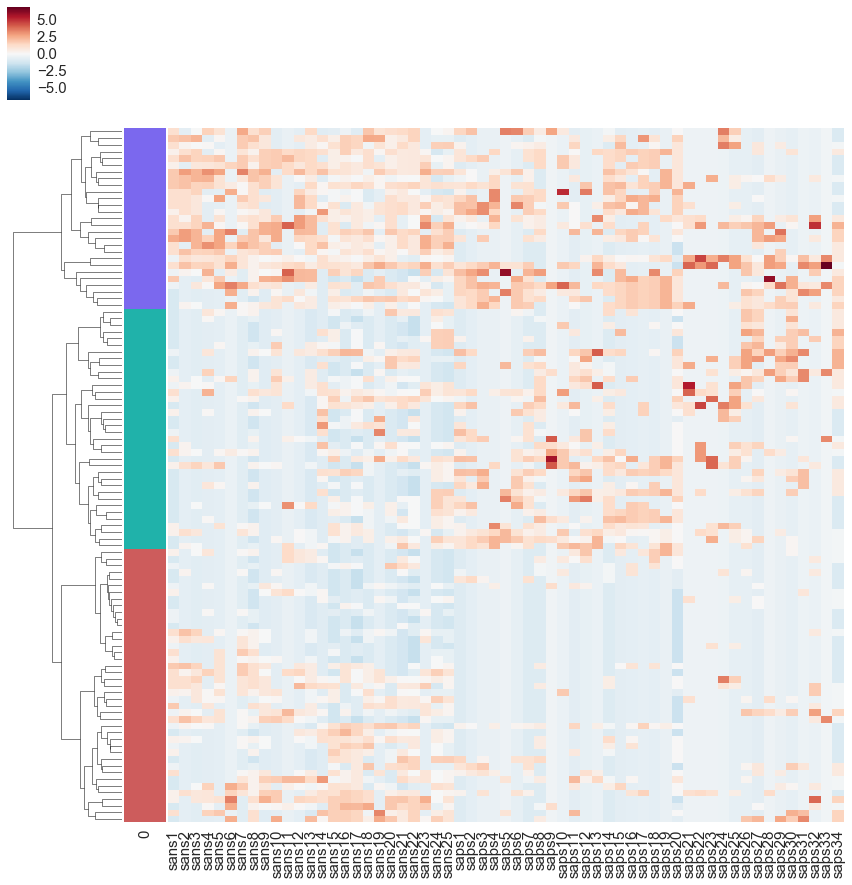

In [22]:
from scipy.spatial import distance
from scipy.cluster import hierarchy

clinData_zscored = clinData_zscored.fillna(0)
corr = clinData_zscored[SAPS_SANS_labels]
corr = corr.reset_index(drop=True)

# corr = clinData_zscored[SAPS_SANS_labels]

corr_array = np.asarray(corr)

num_of_clusters = 3

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# cmap = sns.palplot(sns.cubehelix_palette(8))
# cmap = sns.cubehelix_palette(light=1.1, as_cmap=True)

row_linkage = hierarchy.linkage(
    distance.pdist(corr, metric ='euclidean'), method='ward')#'euclidean',method='ward')

# col_linkage = hierarchy.linkage(
#     distance.pdist(corr.T, metric ='euclidean'), method='ward')#metric ='euclidean',method='ward')

# row_linkage = hierarchy.linkage(
#     distance.pdist(corr, metric ='correlation'), method='ward')#'euclidean',method='ward')

# col_linkage = hierarchy.linkage(
#     distance.pdist(corr.T, metric ='correlation'), method='ward')#metric ='euclidean',method='ward')

T = sch.fcluster(row_linkage, num_of_clusters, 'maxclust')
print(np.sum(T==1),np.sum(T==2),np.sum(T==3),np.sum(T==4),np.sum(T==5),np.sum(T==6))
print(np.sum(T==1)+np.sum(T==2)+np.sum(T==3)+np.sum(T==4)+np.sum(T==5)+np.sum(T==6))

colors=['#12efff','#eee111','#7b68ee','#e00fff','#20b2aa','#abc222','#cd5c5c','#123fff','#d02090','#2edf4f','#2eaf9f','#22222f',
        '#eeeff1','#eee112','#00ef00','#aa0000','#0000aa','#000999','#32efff','#23ef68','#2e3f56','#7eef1f','#eeef11']

V = pd.DataFrame()
for i in range(0,T.shape[0]):
    V = V.append(pd.DataFrame([colors[(T[i]*2)]]), ignore_index = True) 

sns.set(font_scale=1.5)    
cg = sns.clustermap(corr, row_linkage=row_linkage, col_cluster=False, col_linkage=None, row_colors = V, cmap="RdBu_r", figsize=(15,15), yticklabels=False) 
cg.ax_col_dendrogram.set_visible(False)
# RdBu_r
print(corr.shape)
print(V.shape)

cg.savefig('destination_path.svg', format='svg', dpi=1000)

# Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Vega10, Vega10_r, Vega20, Vega20_r, Vega20b, Vega20b_r, Vega20c, Vega20c_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, inferno, inferno_r, jet, jet_r, magma, magma_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, seismic, seismic_r, spectral, spectral_r, spring, spring_r, summer, summer_r, terrain, terrain_r, viridis, viridis_r, winter, winter_r

#### label clinical data

In [23]:
# clinData_zscored, justCT
labels = pd.DataFrame({'Group': T})
# clinData_zscored = clinData_zscored.reset_index(drop=True)
labeledClinData = pd.concat([labels, clinData_zscored],axis=1)

#### label cortical thickness

In [24]:
# labels = pd.DataFrame({'Group': T})
# CTdata_zscored_byDataset = CTdata_zscored_byDataset.reset_index(drop=True)
labeledCT = pd.concat([labels, CTdata_zscored_byDataset],axis=1)

In [25]:
print(labels.shape)
print(labeledClinData.shape)
print(labeledCT.shape)

(104, 1)
(104, 62)
(104, 84)


#### bar graph of cluster membership info

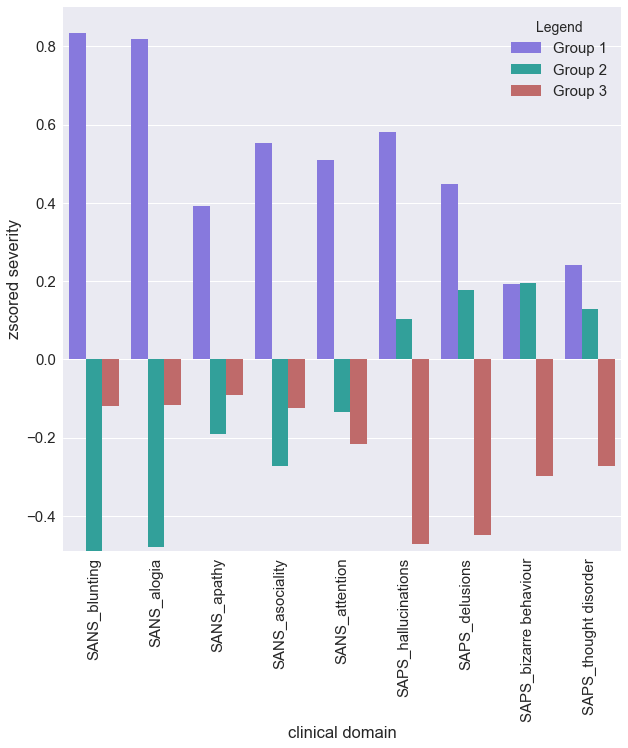

In [26]:
group1_mean = labeledClinData[labeledClinData['Group']==1].mean()
group1_std = labeledClinData[labeledClinData['Group']==1].std()
Group1_blunting = np.mean(group1_mean.iloc[[1,2,3,4,5,6,7,8]])
Group1_alogia = np.mean(group1_mean.iloc[[9,10,11,12,13]])
Group1_apathy = np.mean(group1_mean.iloc[[14,15,16,17]])
Group1_asociality = np.mean(group1_mean.iloc[[18,19,20,21,22]])
Group1_attention = np.mean(group1_mean.iloc[[23,24,25]])
Group1_hallucinations = np.mean(group1_mean.iloc[[26,27,28,29,30,31,32]])
Group1_delusions = np.mean(group1_mean.iloc[[33,34,35,36,37,38,39,40,41,42,43,44,45]])
Group1_bibeh = np.mean(group1_mean.iloc[[46,47,48,49,50]])
Group1_positiveF = np.mean(group1_mean.iloc[[51,52,53,54,55,56,57,58,59]])
Group1 = [Group1_blunting,Group1_alogia,Group1_apathy,Group1_asociality,Group1_attention,Group1_hallucinations,Group1_delusions,Group1_bibeh,Group1_positiveF]


group2_mean = labeledClinData[labeledClinData['Group']==2].mean()
group2_std = labeledClinData[labeledClinData['Group']==2].std()
Group2_blunting = np.mean(group2_mean.iloc[[1,2,3,4,5,6,7,8]])
Group2_alogia = np.mean(group2_mean.iloc[[9,10,11,12,13]])
Group2_apathy = np.mean(group2_mean.iloc[[14,15,16,17]])
Group2_asociality = np.mean(group2_mean.iloc[[18,19,20,21,22]])
Group2_attention = np.mean(group2_mean.iloc[[23,24,25]])
Group2_hallucinations = np.mean(group2_mean.iloc[[26,27,28,29,30,31,32]])
Group2_delusions = np.mean(group2_mean.iloc[[33,34,35,36,37,38,39,40,41,42,43,44,45]])
Group2_bibeh = np.mean(group2_mean.iloc[[46,47,48,49,50]])
Group2_positiveF = np.mean(group2_mean.iloc[[51,52,53,54,55,56,57,58,59]])
Group2 = [Group2_blunting,Group2_alogia,Group2_apathy,Group2_asociality,Group2_attention,Group2_hallucinations,Group2_delusions,Group2_bibeh,Group2_positiveF]

group3_mean = labeledClinData[labeledClinData['Group']==3].mean()
group3_std = labeledClinData[labeledClinData['Group']==3].std()
Group3_blunting = np.mean(group3_mean.iloc[[1,2,3,4,5,6,7,8]])
Group3_alogia = np.mean(group3_mean.iloc[[9,10,11,12,13]])
Group3_apathy = np.mean(group3_mean.iloc[[14,15,16,17]])
Group3_asociality = np.mean(group3_mean.iloc[[18,19,20,21,22]])
Group3_attention = np.mean(group3_mean.iloc[[23,24,25]])
Group3_hallucinations = np.mean(group3_mean.iloc[[26,27,28,29,30,31,32]])
Group3_delusions = np.mean(group3_mean.iloc[[33,34,35,36,37,38,39,40,41,42,43,44,45]])
Group3_bibeh = np.mean(group3_mean.iloc[[46,47,48,49,50]])
Group3_positiveF = np.mean(group3_mean.iloc[[51,52,53,54,55,56,57,58,59]])
Group3 = [Group3_blunting,Group3_alogia,Group3_apathy,Group3_asociality,Group3_attention,Group3_hallucinations,Group3_delusions,Group3_bibeh,Group3_positiveF]

group4_mean = labeledClinData[labeledClinData['Group']==4].mean()
group4_std = labeledClinData[labeledClinData['Group']==4].std()
Group4_blunting = np.mean(group4_mean.iloc[[1,2,3,4,5,6,7,8]])
Group4_alogia = np.mean(group4_mean.iloc[[9,10,11,12,13]])
Group4_apathy = np.mean(group4_mean.iloc[[14,15,16,17]])
Group4_asociality = np.mean(group4_mean.iloc[[18,19,20,21,22]])
Group4_attention = np.mean(group4_mean.iloc[[23,24,25]])
Group4_hallucinations = np.mean(group4_mean.iloc[[26,27,28,29,30,31,32]])
Group4_delusions = np.mean(group4_mean.iloc[[33,34,35,36,37,38,39,40,41,42,43,44,45]])
Group4_bibeh = np.mean(group4_mean.iloc[[46,47,48,49,50]])
Group4_positiveF = np.mean(group4_mean.iloc[[51,52,53,54,55,56,57,58,59]])
Group4 = [Group4_blunting,Group4_alogia,Group4_apathy,Group4_asociality,Group4_attention,Group4_hallucinations,Group4_delusions,Group4_bibeh,Group4_positiveF]

import matplotlib.pyplot as pyplot
df = pd.DataFrame({
    'Group': ['SANS_blunting','SANS_alogia', 'SANS_apathy','SANS_asociality', 'SANS_attention','SAPS_hallucinations', 'SAPS_delusions','SAPS_bizarre behaviour', 'SAPS_thought disorder'],
    'Group 1': Group1,
    'Group 2': Group2,
    'Group 3': Group3,
    'Group 4': Group4
})
fig, ax1 = pyplot.subplots(figsize=(10, 10))
tidy = (
    df.set_index('Group')
      .stack()  # un-pivots the data 
      .reset_index()  # moves all data out of the index
      .rename(columns={'level_1': 'Legend', 0: 'Group1_positiveF'})
)
snsplot = sns.barplot(x='Group', y='Group1_positiveF', hue='Legend', palette=['#7b68ee', '#20b2aa', '#cd5c5c','#d02090'], data=tidy, ax=ax1)
for item in snsplot.get_xticklabels():
    item.set_rotation(90)
sns.despine(fig)
snsplot.set(xlabel='clinical domain', ylabel='zscored severity')
sns.set(font_scale=2.7)
plt.show()

fig.savefig('bar_plot.svg', format='svg', dpi=1000)

In [27]:
labeledClinData.columns

Index([u'Group', u'sans1', u'sans2', u'sans3', u'sans4', u'sans5', u'sans6',
       u'sans7', u'sans8', u'sans9', u'sans10', u'sans11', u'sans12',
       u'sans13', u'sans14', u'sans15', u'sans16', u'sans17', u'sans18',
       u'sans19', u'sans20', u'sans21', u'sans22', u'sans23', u'sans24',
       u'sans25', u'saps1', u'saps2', u'saps3', u'saps4', u'saps5', u'saps6',
       u'saps7', u'saps8', u'saps9', u'saps10', u'saps11', u'saps12',
       u'saps13', u'saps14', u'saps15', u'saps16', u'saps17', u'saps18',
       u'saps19', u'saps20', u'saps21', u'saps22', u'saps23', u'saps24',
       u'saps25', u'saps26', u'saps27', u'saps28', u'saps29', u'saps30',
       u'saps31', u'saps32', u'saps33', u'saps34', u'dataset', u'subjectid'],
      dtype='object')

In [28]:
order = sorted(labeledClinData.Group.unique())

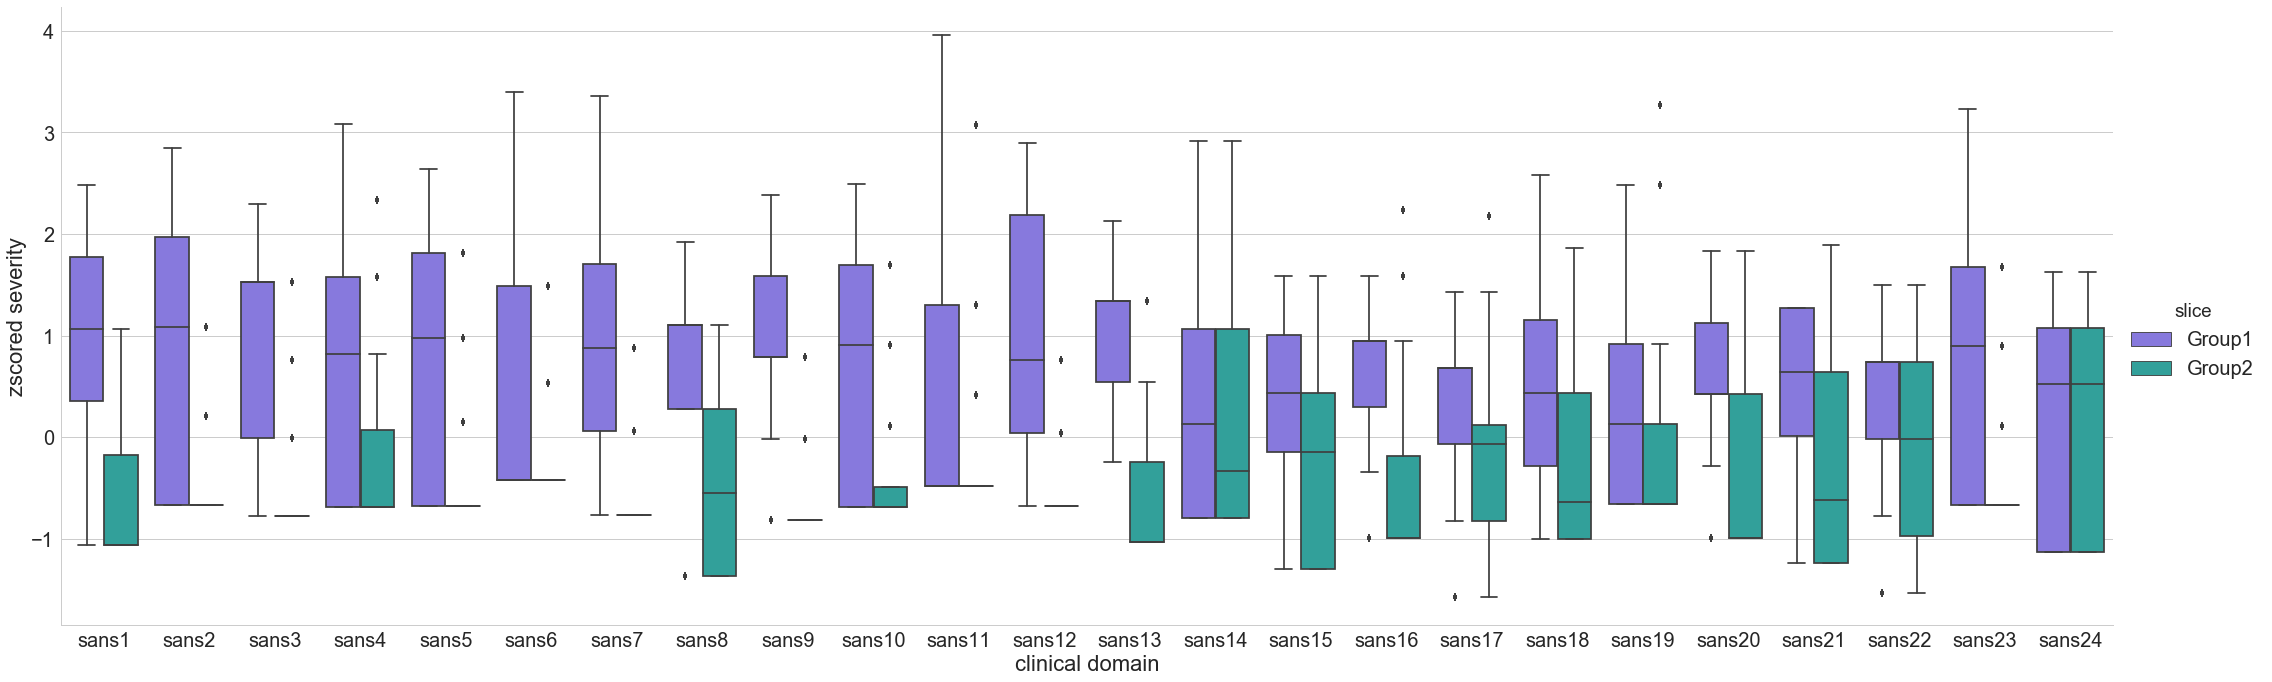

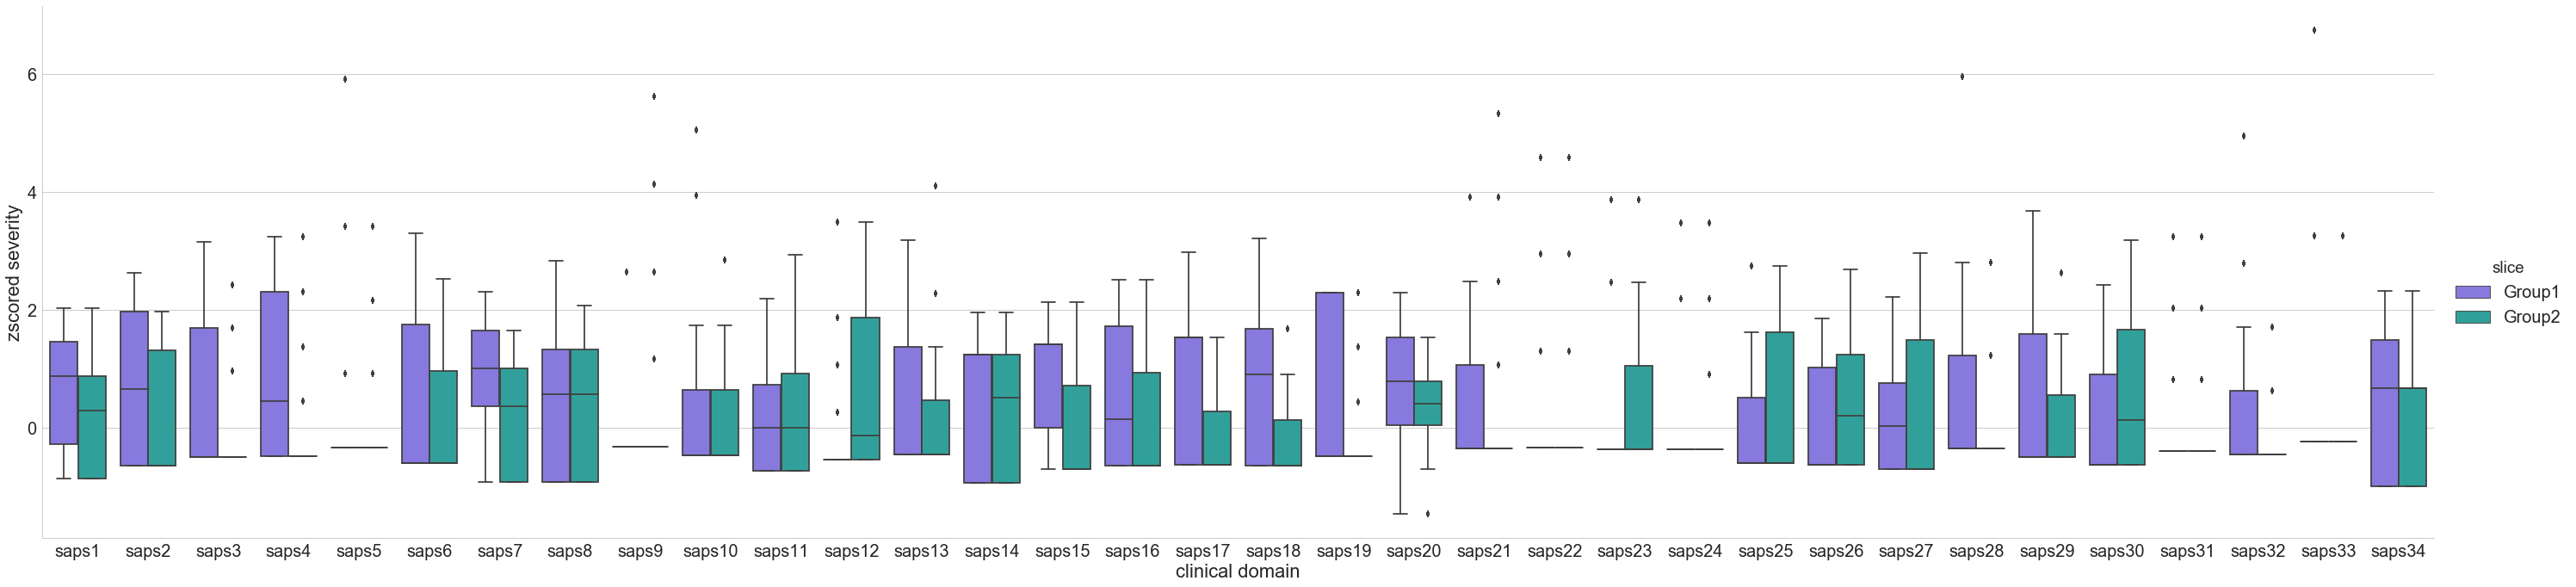

In [29]:
#zscored
sliced_dfs = {'Group1':labeledClinData[labeledClinData['Group']==1][['Group',
        u'sans1', u'sans2', u'sans3', u'sans4', u'sans5', u'sans6',
       u'sans7', u'sans8', u'sans9', u'sans10', u'sans11', u'sans12',
       u'sans13', u'sans14', u'sans15', u'sans16', u'sans17', u'sans18',
       u'sans19', u'sans20', u'sans21', u'sans22', u'sans23', u'sans24']],
              'Group2':labeledClinData[labeledClinData['Group']==2][['Group',
        u'sans1', u'sans2', u'sans3', u'sans4', u'sans5', u'sans6',
       u'sans7', u'sans8', u'sans9', u'sans10', u'sans11', u'sans12',
       u'sans13', u'sans14', u'sans15', u'sans16', u'sans17', u'sans18',
       u'sans19', u'sans20', u'sans21', u'sans22', u'sans23', u'sans24']], 
              'Group3':labeledClinData[labeledClinData['Group']==3][['Group',
        u'sans1', u'sans2', u'sans3', u'sans4', u'sans5', u'sans6',
       u'sans7', u'sans8', u'sans9', u'sans10', u'sans11', u'sans12',
       u'sans13', u'sans14', u'sans15', u'sans16', u'sans17', u'sans18',
       u'sans19', u'sans20', u'sans21', u'sans22', u'sans23', u'sans24']],
             'Group4':labeledClinData[labeledClinData['Group']==4][['Group',
        u'sans1', u'sans2', u'sans3', u'sans4', u'sans5', u'sans6',
       u'sans7', u'sans8', u'sans9', u'sans10', u'sans11', u'sans12',
       u'sans13', u'sans14', u'sans15', u'sans16', u'sans17', u'sans18',
       u'sans19', u'sans20', u'sans21', u'sans22', u'sans23', u'sans24']]}

plot_df = pd.DataFrame()
for key in sliced_dfs.keys():
    sliced_df = sliced_dfs[key]
    for col in sliced_df.columns:
        sliced_df_melt = pd.melt(sliced_df, id_vars=['Group'],value_vars=list(sliced_df.columns).remove('Group'),
                                 var_name='clinical domain',value_name='zscored severity')
        sliced_df_melt['slice'] = np.tile(key,len(sliced_df_melt))
        
        plot_df = plot_df.append(sliced_df_melt)
        
sns.set(font_scale=2)
with sns.axes_style("whitegrid"):
    g = sns.factorplot(x='clinical domain',y='zscored severity',hue_order = ['Group1', 'Group2'],hue='slice', palette=['#7b68ee', '#20b2aa', '#cd5c5c','#d02090'], data=plot_df, kind='box',size=10,ci=None,aspect=3,orient="v")
    
plt.show()

#zscored
sliced_dfs = {'Group1':labeledClinData[labeledClinData['Group']==1][['Group',
        u'saps1', u'saps2', u'saps3', u'saps4', u'saps5', u'saps6',
       u'saps7', u'saps8', u'saps9', u'saps10', u'saps11', u'saps12',
       u'saps13', u'saps14', u'saps15', u'saps16', u'saps17', u'saps18',
       u'saps19', u'saps20', u'saps21', u'saps22', u'saps23', u'saps24',
       u'saps25', u'saps26', u'saps27', u'saps28', u'saps29', u'saps30',
       u'saps31', u'saps32', u'saps33', u'saps34']],
              'Group2':labeledClinData[labeledClinData['Group']==2][['Group',
        u'saps1', u'saps2', u'saps3', u'saps4', u'saps5', u'saps6',
       u'saps7', u'saps8', u'saps9', u'saps10', u'saps11', u'saps12',
       u'saps13', u'saps14', u'saps15', u'saps16', u'saps17', u'saps18',
       u'saps19', u'saps20', u'saps21', u'saps22', u'saps23', u'saps24',
       u'saps25', u'saps26', u'saps27', u'saps28', u'saps29', u'saps30',
       u'saps31', u'saps32', u'saps33', u'saps34']], 
              'Group3':labeledClinData[labeledClinData['Group']==3][['Group',
        u'saps1', u'saps2', u'saps3', u'saps4', u'saps5', u'saps6',
       u'saps7', u'saps8', u'saps9', u'saps10', u'saps11', u'saps12',
       u'saps13', u'saps14', u'saps15', u'saps16', u'saps17', u'saps18',
       u'saps19', u'saps20', u'saps21', u'saps22', u'saps23', u'saps24',
       u'saps25', u'saps26', u'saps27', u'saps28', u'saps29', u'saps30',
       u'saps31', u'saps32', u'saps33', u'saps34']],
             'Group4':labeledClinData[labeledClinData['Group']==4][['Group',
        u'saps1', u'saps2', u'saps3', u'saps4', u'saps5', u'saps6',
       u'saps7', u'saps8', u'saps9', u'saps10', u'saps11', u'saps12',
       u'saps13', u'saps14', u'saps15', u'saps16', u'saps17', u'saps18',
       u'saps19', u'saps20', u'saps21', u'saps22', u'saps23', u'saps24',
       u'saps25', u'saps26', u'saps27', u'saps28', u'saps29', u'saps30',
       u'saps31', u'saps32', u'saps33', u'saps34']]}

plot_df = pd.DataFrame()
for key in sliced_dfs.keys():
    sliced_df = sliced_dfs[key]
    for col in sliced_df.columns:
        sliced_df_melt = pd.melt(sliced_df, id_vars=['Group'],value_vars=list(sliced_df.columns).remove('Group'),
                                 var_name='clinical domain',value_name='zscored severity')
        sliced_df_melt['slice'] = np.tile(key,len(sliced_df_melt))
        
        plot_df = plot_df.append(sliced_df_melt)
        
sns.set(font_scale=2)
with sns.axes_style("whitegrid"):
    g = sns.factorplot(x='clinical domain',y='zscored severity',hue_order = ['Group1', 'Group2'],hue='slice', palette=['#7b68ee', '#20b2aa', '#cd5c5c','#d02090'], data=plot_df, kind='box',size=10,ci=None,aspect=4,orient="v")
    
plt.show()

#### info

In [30]:
age_sex_slice = CTdata_zscored_byDataset[['age','sex','subjectid']]
clinData_zscored_age_sex_slice = clinData_zscored.merge(age_sex_slice,on=['subjectid'])
#clinData_zscored_age_sex_slice

In [31]:
# print(clinData_zscored_age_sex_slice[clinData_zscored_age_sex_slice['dataset']=='NMorph']['sex'].value_counts())
print(clinData_zscored_age_sex_slice[clinData_zscored_age_sex_slice['dataset']=='NUSDAST']['sex'].value_counts())
# print(clinData_zscored_age_sex_slice[clinData_zscored_age_sex_slice['dataset']=='fBIRN']['sex'].value_counts())
# print(clinData_zscored_age_sex_slice[clinData_zscored_age_sex_slice['dataset']=='NMorph']['age'].mean())
# print(clinData_zscored_age_sex_slice[clinData_zscored_age_sex_slice['dataset']=='NMorph']['age'].std())
# print(clinData_zscored_age_sex_slice[clinData_zscored_age_sex_slice['dataset']=='NMorph']['age'].min())
# print(clinData_zscored_age_sex_slice[clinData_zscored_age_sex_slice['dataset']=='NMorph']['age'].max())
print(clinData_zscored_age_sex_slice[clinData_zscored_age_sex_slice['dataset']=='NUSDAST']['age'].mean())
print(clinData_zscored_age_sex_slice[clinData_zscored_age_sex_slice['dataset']=='NUSDAST']['age'].std())
print(clinData_zscored_age_sex_slice[clinData_zscored_age_sex_slice['dataset']=='NUSDAST']['age'].min())
print(clinData_zscored_age_sex_slice[clinData_zscored_age_sex_slice['dataset']=='NUSDAST']['age'].max())
# print(clinData_zscored_age_sex_slice[clinData_zscored_age_sex_slice['dataset']=='fBIRN']['age'].mean())
# print(clinData_zscored_age_sex_slice[clinData_zscored_age_sex_slice['dataset']=='fBIRN']['age'].std())
# print(clinData_zscored_age_sex_slice[clinData_zscored_age_sex_slice['dataset']=='fBIRN']['age'].min())
# print(clinData_zscored_age_sex_slice[clinData_zscored_age_sex_slice['dataset']=='fBIRN']['age'].max())

print(labeledClinData[T==1]['dataset'].value_counts())
print(labeledClinData[T==2]['dataset'].value_counts())
print(labeledClinData[T==3]['dataset'].value_counts())
print(labeledClinData[T==4]['dataset'].value_counts())

print()
print("Sex Group1:")

print(clinData_zscored_age_sex_slice[T==1]['sex'].value_counts())

print("Sex Group2:")

print(clinData_zscored_age_sex_slice[T==2]['sex'].value_counts())

print("Sex Group3:")

print(clinData_zscored_age_sex_slice[T==3]['sex'].value_counts())

print("Sex Group4:")

print(clinData_zscored_age_sex_slice[T==4]['sex'].value_counts())

print()
print("Age:")

print("Group1: {}, Group2: {}, Group3: {}, Group4: {}".format(clinData_zscored_age_sex_slice[T==1]['age'].mean(), clinData_zscored_age_sex_slice[T==2]['age'].mean(), clinData_zscored_age_sex_slice[T==3]['age'].mean(), clinData_zscored_age_sex_slice[T==4]['age'].mean()))

print()
print("Standard deviation:")

print("Group1: {}, Group2: {}, Group3: {}, Group4: {}".format(clinData_zscored_age_sex_slice[T==1]['age'].std(), clinData_zscored_age_sex_slice[T==2]['age'].std(), clinData_zscored_age_sex_slice[T==3]['age'].std(), clinData_zscored_age_sex_slice[T==4]['age'].std()))

1    63
0    41
Name: sex, dtype: int64
33.0673076923
12.428642478
17
61
NUSDAST    27
Name: dataset, dtype: int64
NUSDAST    36
Name: dataset, dtype: int64
NUSDAST    41
Name: dataset, dtype: int64
Series([], Name: dataset, dtype: int64)
()
Sex Group1:
1    15
0    12
Name: sex, dtype: int64
Sex Group2:
1    22
0    14
Name: sex, dtype: int64
Sex Group3:
1    26
0    15
Name: sex, dtype: int64
Sex Group4:
Series([], Name: sex, dtype: int64)
()
Age:
Group1: 31.3333333333, Group2: 35.8333333333, Group3: 31.7804878049, Group4: nan
()
Standard deviation:
Group1: 12.4065739398, Group2: 13.3812235187, Group3: 11.4204032221, Group4: nan


#### radar plots

0.834547807454 0.191333420988
0.195968442702 -0.488962868764
-0.0921057803562 -0.473238039287
nan nan


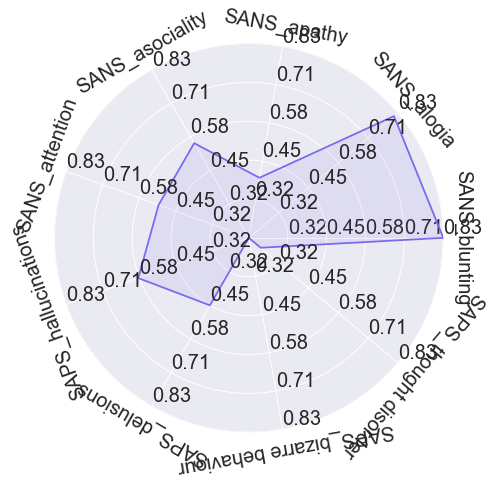

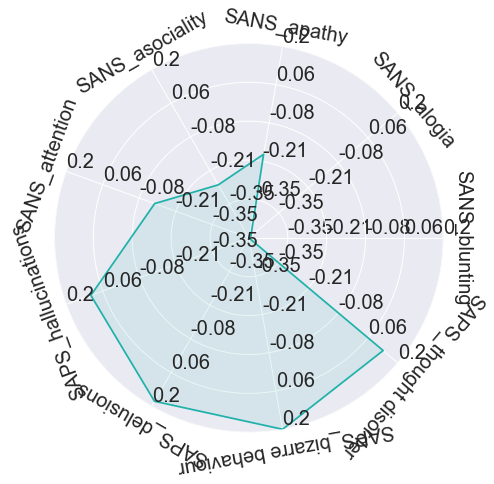

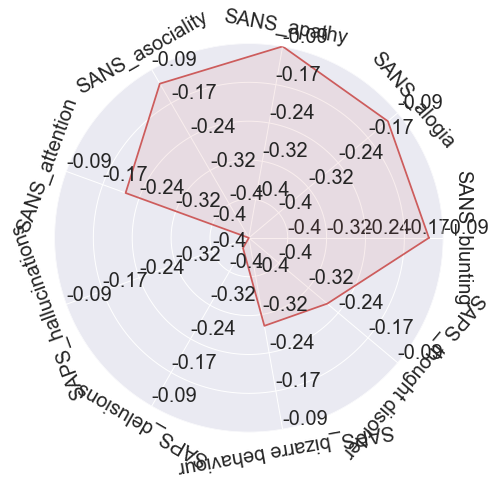

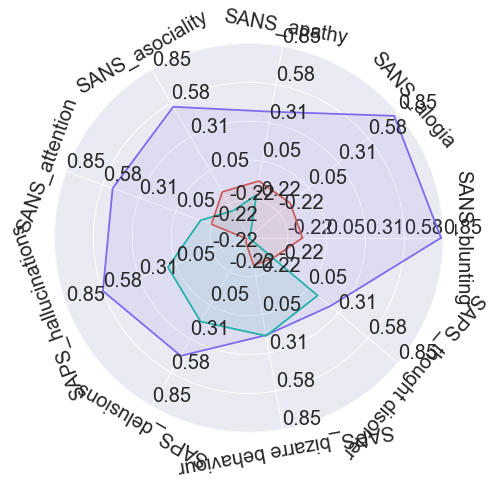

In [32]:
import seaborn as sns # improves plot aesthetics


def _invert(x, limits):
    """inverts a value x on a scale from
    limits[0] to limits[1]"""
    return limits[1] - (x - limits[0])

def _scale_data(data, ranges):
    """scales data[1:] to ranges[0],
    inverts if the scale is reversed"""
    # for d, (y1, y2) in zip(data[1:], ranges[1:]):
    for d, (y1, y2) in zip(data, ranges):
        assert (y1 <= d <= y2) or (y2 <= d <= y1)

    x1, x2 = ranges[0]
    d = data[0]

    if x1 > x2:
        d = _invert(d, (x1, x2))
        x1, x2 = x2, x1

    sdata = [d]

    for d, (y1, y2) in zip(data[1:], ranges[1:]):
        if y1 > y2:
            d = _invert(d, (y1, y2))
            y1, y2 = y2, y1

        sdata.append((d-y1) / (y2-y1) * (x2 - x1) + x1)

    return sdata

def set_rgrids(self, radii, labels=None, angle=None, fmt=None,
               **kwargs):
    """
    Set the radial locations and labels of the *r* grids.
    The labels will appear at radial distances *radii* at the
    given *angle* in degrees.
    *labels*, if not None, is a ``len(radii)`` list of strings of the
    labels to use at each radius.
    If *labels* is None, the built-in formatter will be used.
    Return value is a list of tuples (*line*, *label*), where
    *line* is :class:`~matplotlib.lines.Line2D` instances and the
    *label* is :class:`~matplotlib.text.Text` instances.
    kwargs are optional text properties for the labels:
    %(Text)s
    ACCEPTS: sequence of floats
    """
    # Make sure we take into account unitized data
    radii = self.convert_xunits(radii)
    radii = np.asarray(radii)
    rmin = radii.min()
    # if rmin <= 0:
    #     raise ValueError('radial grids must be strictly positive')

    self.set_yticks(radii)
    if labels is not None:
        self.set_yticklabels(labels)
    elif fmt is not None:
        self.yaxis.set_major_formatter(FormatStrFormatter(fmt))
    if angle is None:
        angle = self.get_rlabel_position()
    self.set_rlabel_position(angle)
    for t in self.yaxis.get_ticklabels():
        t.update(kwargs)
    return self.yaxis.get_gridlines(), self.yaxis.get_ticklabels()

class ComplexRadar():
    def __init__(self, fig, variables, ranges,
                 n_ordinate_levels=6):
        angles = np.arange(0, 360, 360./len(variables))

        axes = [fig.add_axes([0.1,0.1,0.9,0.9],polar=True,
                label = "axes{}".format(i)) 
                for i in range(len(variables))]
        l, text = axes[0].set_thetagrids(angles, 
                                         labels=variables)
        [txt.set_rotation(angle-90) for txt, angle 
             in zip(text, angles)]
        for ax in axes[1:]:
            ax.patch.set_visible(False)
            ax.grid("off")
            ax.xaxis.set_visible(False)
        for i, ax in enumerate(axes):
            grid = np.linspace(*ranges[i], 
                               num=n_ordinate_levels)
            gridlabel = ["{}".format(round(x,2)) 
                         for x in grid]
            if ranges[i][0] > ranges[i][1]:
                grid = grid[::-1] # hack to invert grid
                          # gridlabels aren't reversed
            gridlabel[0] = "" # clean up origin
            # ax.set_rgrids(grid, labels=gridlabel, angle=angles[i])
            set_rgrids(ax, grid, labels=gridlabel, angle=angles[i])
            #ax.spines["polar"].set_visible(False)
            ax.set_ylim(*ranges[i])
        # variables for plotting
        self.angle = np.deg2rad(np.r_[angles, angles[0]])
        self.ranges = ranges
        self.ax = axes[0]
    def plot(self, data, *args, **kw):
        sdata = _scale_data(data, self.ranges)
        self.ax.plot(self.angle, np.r_[sdata, sdata[0]], *args, **kw)
    def fill(self, data, *args, **kw):
        sdata = _scale_data(data, self.ranges)
        self.ax.fill(self.angle, np.r_[sdata, sdata[0]], *args, **kw)

# example data
variables = ['SANS_blunting','SANS_alogia', 'SANS_apathy','SANS_asociality', 'SANS_attention','SAPS_hallucinations', 'SAPS_delusions','SAPS_bizarre behaviour', 'SAPS_thought disorder']
# ("Normal Scale", "Inverted Scale", "Inverted 2", 
#             "Normal Scale 2", "Normal 3", "Normal 4 %", "Inverted 3 %")

# (-1.76, 1.1, 1.2, 
#         4.4, 3.4, 86.8, 20)
ranges = [(-0.49,0.85),(-0.49,0.85),(-0.49,0.85),(-0.49,0.85),(-0.49,0.85),(-0.49,0.85),(-0.49,0.85),(-0.49,0.85),(-0.49,0.85)]
ranges1 = [(np.min(Group1),np.max(Group1)),(np.min(Group1),np.max(Group1)),(np.min(Group1),np.max(Group1)),(np.min(Group1),np.max(Group1)),(np.min(Group1),np.max(Group1)),(np.min(Group1),np.max(Group1)),(np.min(Group1),np.max(Group1)),(np.min(Group1),np.max(Group1)),(np.min(Group1),np.max(Group1))]
ranges2 = [(np.min(Group2),np.max(Group2)),(np.min(Group2),np.max(Group2)),(np.min(Group2),np.max(Group2)),(np.min(Group2),np.max(Group2)),(np.min(Group2),np.max(Group2)),(np.min(Group2),np.max(Group2)),(np.min(Group2),np.max(Group2)),(np.min(Group2),np.max(Group2)),(np.min(Group2),np.max(Group2))]
ranges3 = [(np.min(Group3),np.max(Group3)),(np.min(Group3),np.max(Group3)),(np.min(Group3),np.max(Group3)),(np.min(Group3),np.max(Group3)),(np.min(Group3),np.max(Group3)),(np.min(Group3),np.max(Group3)),(np.min(Group3),np.max(Group3)),(np.min(Group3),np.max(Group3)),(np.min(Group3),np.max(Group3))]
ranges4 = [(np.min(Group4),np.max(Group4)),(np.min(Group4),np.max(Group4)),(np.min(Group4),np.max(Group4)),(np.min(Group4),np.max(Group4)),(np.min(Group4),np.max(Group4)),(np.min(Group4),np.max(Group4)),(np.min(Group4),np.max(Group4)),(np.min(Group4),np.max(Group4)),(np.min(Group4),np.max(Group4))]

#[(-0.65,1.2),(-0.65,1.2),(-0.65,1.2),(-0.65,1.2),(-0.65,1.2),(-0.65,1.2),(-0.65,1.2),(-0.65,1.2),(-0.65,1.2)]
# [(-5, 3), (1.5, 0.3), (1.3, 0.5),
#          (1.7, 4.5), (1.5, 3.7), (70, 87), (100, -50)]            
# plotting


# #
print np.max(Group1), np.min(Group1)
print np.max(Group2), np.min(Group2)
print np.max(Group3), np.min(Group3)
print np.max(Group4), np.min(Group4)
#print np.max(Group5), np.min(Group5)
#'#7b68ee', '#20b2aa', '#cd5c5c','#d02090'
fig1 = plt.figure(figsize=(6, 6))
radar = ComplexRadar(fig1, variables,ranges1)
radar.plot(Group1, color='#7b68ee')
radar.fill(Group1, alpha=0.1, color='#7b68ee')


fig2 = plt.figure(figsize=(6, 6))
radar = ComplexRadar(fig2, variables,ranges2)
radar.plot(Group2,color='#20b2aa')
radar.fill(Group2, alpha=0.1,color='#20b2aa')

fig3 = plt.figure(figsize=(6, 6))
radar = ComplexRadar(fig3, variables,ranges3)
radar.plot(Group3,color='#cd5c5c')
radar.fill(Group3, alpha=0.1,color='#cd5c5c')

# fig4 = plt.figure(figsize=(6, 6))
# radar = ComplexRadar(fig4, variables,ranges4)
# radar.plot(Group4,color='#d02090')
# radar.fill(Group4, alpha=0.1,color='#d02090')

fig0 = plt.figure(figsize=(6, 6))
radar = ComplexRadar(fig0, variables,ranges)
radar.plot(Group1, color='#7b68ee')
radar.fill(Group1, alpha=0.1, color='#7b68ee')

radar = ComplexRadar(fig0, variables,ranges)
radar.plot(Group2,color='#20b2aa')
radar.fill(Group2, alpha=0.1,color='#20b2aa')

radar = ComplexRadar(fig0, variables,ranges)
radar.plot(Group3,color='#cd5c5c')
radar.fill(Group3, alpha=0.1,color='#cd5c5c')
fig0.savefig('radar.png', format='png', dpi=1000)

# radar = ComplexRadar(fig0, variables,ranges)
# radar.plot(Group4,color='#d02090')
# radar.fill(Group4, alpha=0.1,color='#d02090')

# radar = ComplexRadar(fig1, variables,ranges)
# radar.plot(Group5,color="m")
# radar.fill(Group5, alpha=0.1,color="m")


In [33]:
sns.set(font_scale=1.3)

In [34]:
#clinData_zscored

#### dendrogram clustering stability

In [36]:
# number of permutations
n_permutations = 1000

# store results of each permutation
sim = np.zeros((n_permutations, 1))

for n_perm in range(0, n_permutations):
    
    df = clinData_zscored[SAPS_SANS_labels]
    # sample 80% of the data twice
    sub1 = df.sample(frac=0.8)
    sub2 = df.sample(frac=0.8)

    # represents which subjects from the original dataset are chosen in the subsamples
    sub1_names = np.sort(sub1.T.columns.values)  
    sub2_names = np.sort(sub2.T.columns.values)
    # subjects in common in the two subsamples
    intersect = np.intersect1d(sub1_names,sub2_names)

    intersectDF = pd.DataFrame(intersect)

    ###### replace this with your clustering technique
    # Compute the correlation distance matrix
#     corr_sub1 = sub1.T.corr()
#     corr_sub1 = 1-corr_sub1.fillna(0)
#     corr_sub2 = sub2.T.corr()
#     corr_sub2 = 1-corr_sub2.fillna(0)

    num_of_clusters = 3
    
    row_linkage = hierarchy.linkage(distance.pdist(sub1), metric ='euclidean',method='ward')
    T = sch.fcluster(row_linkage, num_of_clusters, 'maxclust')

#     row_linkage = hierarchy.linkage(distance.pdist(sub1), metric ='correlation',method='ward')
#     T = sch.fcluster(row_linkage, num_of_clusters, 'maxclust')


#     Z = linkage(sub1,method='ward', metric='euclidean')
#     T = sch.fcluster(Z, num_of_clusters, 'maxclust')
    
    #print np.sum(T==1),np.sum(T==2),np.sum(T==3),np.sum(T==4)
    
    # labeled_sub1 = place in the original dataset, info, label
    labeled_sub1 = np.column_stack((sub1.T.columns.values,sub1,T))
    labeled_sub1_df = pd.DataFrame(labeled_sub1,columns=list(['Place in dataset','ft1','ft2','ft3','ft1','ft2','ft3','ft1','ft2','ft3','ft1','ft2','ft3','ft1','ft2','ft3','ft1','ft2','ft3','ft1','ft2','ft3','ft1','ft2','ft3','ft1','ft2','ft3','ft1','ft2','ft3','ft1','ft2','ft3','ft1','ft2','ft3','ft1','ft2','ft3','ft1','ft2','ft3','ft1','ft2','ft3','ft1','ft2','ft3','ft1','ft2','ft3','ft1','ft2','ft3','ft1','ft2','ft3','ft1','ft2','Label']))

    row_linkage = hierarchy.linkage(distance.pdist(sub2), metric ='euclidean',method='ward')
    T = sch.fcluster(row_linkage, num_of_clusters, 'maxclust')

#     row_linkage = hierarchy.linkage(distance.pdist(sub2), metric ='correlation',method='ward')
#     T = sch.fcluster(row_linkage, num_of_clusters, 'maxclust')
    
#     Z = linkage(sub2,method='ward', metric='euclidean')
#     T = sch.fcluster(Z, num_of_clusters, 'maxclust')

    #print np.sum(T==1),np.sum(T==2),np.sum(T==3),np.sum(T==4)
    
    labeled_sub2 = np.column_stack((sub2.T.columns.values,sub2,T))
    labeled_sub2_df = pd.DataFrame(labeled_sub2,columns=list(['Place in dataset','ft1','ft2','ft3','ft1','ft2','ft3','ft1','ft2','ft3','ft1','ft2','ft3','ft1','ft2','ft3','ft1','ft2','ft3','ft1','ft2','ft3','ft1','ft2','ft3','ft1','ft2','ft3','ft1','ft2','ft3','ft1','ft2','ft3','ft1','ft2','ft3','ft1','ft2','ft3','ft1','ft2','ft3','ft1','ft2','ft3','ft1','ft2','ft3','ft1','ft2','ft3','ft1','ft2','ft3','ft1','ft2','ft3','ft1','ft2','Label']))
    
    #########
    # for next stage need labeled_sub1_df and labeled_sub2_df
    
    #print intersect
    labeled_intersect_labels = np.zeros((intersect.shape[0], 3))
    for x in range(0, intersect.shape[0]):
        indices1 = list(np.where(labeled_sub1_df["Place in dataset"]==intersect[x])[0])
        indices2 = list(np.where(labeled_sub2_df["Place in dataset"]==intersect[x])[0])
        #print labeled_sub2_df.iloc[indices]
        labeled_intersect_labels[x,0]=intersect[x]
        labeled_intersect_labels[x,2]=np.array(labeled_sub2_df.iloc[indices2]['Label'])
        labeled_intersect_labels[x,1]=np.array(labeled_sub1_df.iloc[indices1]['Label'])
    
    if n_perm == 0:
        total_labeled_intersect_labels = pd.DataFrame(labeled_intersect_labels, columns=['Place in dataset','Result 1','Result 2'])
    else:
        temp = pd.DataFrame(labeled_intersect_labels, columns=['Place in dataset','Result 1','Result 2'])
        total_labeled_intersect_labels = total_labeled_intersect_labels.merge(temp, how='outer', on='Place in dataset')
    # labeled_intersect_labels - first column: intersecting subjects, second column: labels following clustering of subsample 1, second column: labels following clustering of subsample 2
    just_labeled_intersect_labels = labeled_intersect_labels[:,1:]

    a = labeled_intersect_labels[:,1]
    b = labeled_intersect_labels[:,2]

    # which subjects have common labels for sub1 and sub2
    Caa = np.zeros((a.shape[0], a.shape[0]))
    for x in range(0, a.shape[0]):
        for y in range(0, a.shape[0]):
            if a[x]==a[y]:
                Caa[x,y]=1

    Cbb = np.zeros((b.shape[0], b.shape[0]))
    for x in range(0, b.shape[0]):
        for y in range(0, b.shape[0]):
            if b[x]==b[y]:
                Cbb[x,y]=1

    import math
    sim[n_perm] = sum(sum(np.multiply(Caa,Cbb)))/math.sqrt(sum(sum(np.multiply(Caa,Caa)))*sum(sum(np.multiply(Cbb,Cbb))))
    #print sum(sum(np.multiply(Caa,Cbb)))/math.sqrt(sum(sum(np.multiply(Caa,Caa)))*sum(sum(np.multiply(Cbb,Cbb))))
   

#### stability bar graph

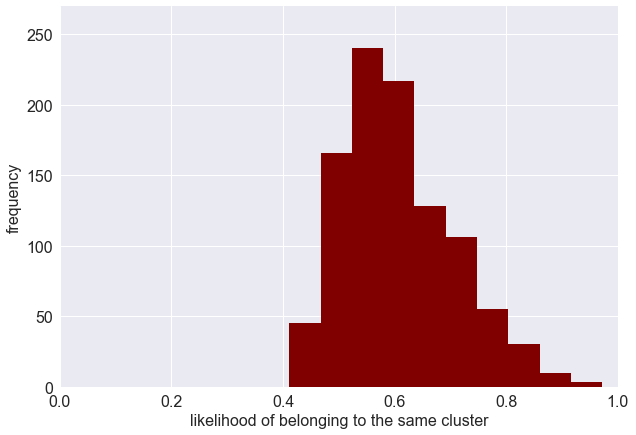

In [37]:
import matplotlib.pyplot as plt

fig = pyplot.subplots(figsize=(10, 7))
plt.hist(sim, align='left',color='maroon')

axes = plt.gca()
axes.set_xlim([0,1])
axes.set_ylim([0,270])
for label in (axes.get_xticklabels() + axes.get_yticklabels()):
    label.set_fontsize(16)
plt.xlabel('likelihood of belonging to the same cluster', fontsize=16)
plt.ylabel('frequency', fontsize=16)
plt.show()
# fig.savefig('stab.eps', format='eps', dpi=1000)

In [38]:
#labeledCT

In [39]:
%store labeledCT

Stored 'labeledCT' (DataFrame)


In [114]:
labeledCT.to_csv('NMorph_euc_3group.csv', sep=',')

In [128]:
#NMorphvsNC = pd.read_csv('NMorph_both.csv')

In [129]:
# X = NMorphvsNC[[u'PreCG.L_CT',
#        u'SFGdor.L_CT', u'ORBsup.L_CT', u'MFG.L_CT', u'ORBmid.L_CT',
#        u'IFGoperc.L_CT', u'IFGtriang.L_CT', u'ORBinf.L_CT', u'ROL.L_CT',
#        u'SMA.L_CT', u'OLF.L_CT', u'SFGmed.L_CT', u'ORBsupmed.L_CT',
#        u'REC.L_CT', u'INS.L_CT', u'ACG.L_CT', u'DCG.L_CT', u'PCG.L_CT',
#        u'PHG.L_CT', u'CAL.L_CT', u'CUN.L_CT', u'LING.L_CT', u'SOG.L_CT',
#        u'MOG.L_CT', u'IOG.L_CT', u'FFG.L_CT', u'PoCG.L_CT', u'SPG.L_CT',
#        u'IPL.L_CT', u'SMG.L_CT', u'ANG.L_CT', u'PCUN.L_CT', u'PCL.L_CT',
#        u'HES.L_CT', u'STG.L_CT', u'TPOsup.L_CT', u'MTG.L_CT', u'TPOmid.L_CT',
#        u'ITG.L_CT', u'Mean.L_CT', u'PreCG.R_CT', u'SFGdor.R_CT',
#        u'ORBsup.R_CT', u'MFG.R_CT', u'ORBmid.R_CT', u'IFGoperc.R_CT',
#        u'IFGtriang.R_CT', u'ORBinf.R_CT', u'ROL.R_CT', u'SMA.R_CT',
#        u'OLF.R_CT', u'SFGmed.R_CT', u'ORBsupmed.R_CT', u'REC.R_CT',
#        u'INS.R_CT', u'ACG.R_CT', u'DCG.R_CT', u'PCG.R_CT', u'PHG.R_CT',
#        u'CAL.R_CT', u'CUN.R_CT', u'LING.R_CT', u'SOG.R_CT', u'MOG.R_CT',
#        u'IOG.R_CT', u'FFG.R_CT', u'PoCG.R_CT', u'SPG.R_CT', u'IPL.R_CT',
#        u'SMG.R_CT', u'ANG.R_CT', u'PCUN.R_CT', u'PCL.R_CT', u'HES.R_CT',
#        u'STG.R_CT', u'TPOsup.R_CT', u'MTG.R_CT', u'TPOmid.R_CT', u'ITG.R_CT',
#        u'Mean.R_CT', u'age', u'sex']].reset_index(drop=True)

# labels = NMorphvsNC[u'dx'].reset_index(drop=True)


In [121]:
# temp = zscore(X)
# X = pd.DataFrame(temp)

In [40]:
# # Grid search for best parameters
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.linear_model import LogisticRegression
# from sklearn.svm import SVR
# from sklearn.multiclass import OneVsRestClassifier
# from sklearn.model_selection import GridSearchCV
# from sklearn.metrics import classification_report
# from sklearn.decomposition import PCA
# from sklearn.svm import LinearSVC
# from sklearn.svm import SVC

# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import confusion_matrix
# # from sklearn.model_selection import KFold
# # from sklearn.model_selection import StratifiedKFold
# from sklearn.cross_validation import StratifiedKFold
# from sklearn import svm
# import math
# from sklearn import linear_model
# from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, auc
# from sklearn.metrics import average_precision_score
# from sklearn.model_selection import LeaveOneOut

# from sklearn.preprocessing import label_binarize

# from scipy import interp
# import matplotlib.pyplot as plt
# from itertools import cycle


# # Binarize the output
# # y = label_binarize(labels, classes=[1, 2])
# # n_classes = 2

# y = np.ravel(labels-1)
# total_acc = 0
# total_spec = 0
# total_sens = 0

# # total_sens_1 = 0
# # total_sens_2 = 0
# # total_sens_3 = 0
# # total_spec_1 = 0
# # total_spec_2 = 0
# # total_spec_3 = 0

# tprs = []
# aucs = []
# mean_fpr = np.linspace(0, 1, 100)

# i = 0
# x = 0

# total_importance = 0
# total_auc = 0
# total_std = 0
# arr = []
    
    

# n_splits=2
# kf = StratifiedKFold(labels,n_folds=n_splits, random_state=None, shuffle=False)

# for train_index, test_index in kf:
#     X_train, X_test = np.array(X.iloc[train_index]), np.array(X.iloc[test_index])
#     y_train, y_test = y[train_index], y[test_index]


#     unique, counts = np.unique(y_train, return_counts=True)
# #         print(zip(unique, counts))

#     unique, counts = np.unique(y_test, return_counts=True)
# #         print(zip(unique, counts))

#     C_range = 10. ** np.arange(-3, 8)
#     gamma_range = 10. ** np.arange(-5, 5)

# #     tuned_parameters = [{'C': C_range, 'gamma':gamma_range, 'kernel':['linear','poly','rbf','sigmoid']}]

# #         tuned_parameters = [{'C': [0.00001,0.00005,0.0001,0.0005,0.001,0.005,0.05,0.01,0.1,0.5,1,5,10,1e2,1e4],
# #                             'kernel':['linear','poly','rbf','sigmoid']}]

#     tuned_parameters = [{'n_estimators': [10, 20, 40, 60,70,80,90,100,150], 
#                          'min_samples_split': [2,4,8]}]

# #     tuned_parameters = [{'C': C_range}]

#     clf = GridSearchCV(RandomForestClassifier(class_weight='balanced', n_jobs=-1), tuned_parameters, cv=3, scoring='accuracy')
#     #     clf = GridSearchCV(LinearSVC(penalty='l2', loss='squared_hinge', class_weight='balanced'),tuned_parameters, cv=3)
# #     clf = GridSearchCV(SVC(class_weight='balanced',probability=True),tuned_parameters, cv=3, scoring='accuracy')
# #     clf = GridSearchCV( linear_model.LogisticRegression(penalty='l2', class_weight='balanced', n_jobs=-1), tuned_parameters, cv=3, scoring='accuracy')

# #         np.random.shuffle(y_train)

#     clf.fit(X_train, y_train)

#     y_pred = clf.predict(X_test)
#     probas_ = clf.fit(X_train, y_train).predict_proba(X_test)

#     cm = confusion_matrix(y_test, y_pred)
#     acc = accuracy_score(y_test, y_pred)

#         # Compute ROC curve and area the curve
#     fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
#     tprs.append(interp(mean_fpr, fpr, tpr))
#     tprs[-1][0] = 0.0
#     roc_auc = auc(fpr, tpr)
#     aucs.append(roc_auc)
#     plt.plot(fpr, tpr, lw=1, alpha=0.3,\
#              label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
#     i += 1

#     total_acc = total_acc + acc
# #     print(total_acc/n_splits, total_sens/n_splits, total_spec/n_splits)

#     # print("acc {}, sens_1 {}, sens_2 {}, sens_3 {}, spec_1 {}, spec_2 {}, spec_3 {}".format(total_acc/n_splits, total_sens_1/n_splits, total_sens_2/n_splits, total_sens_3/n_splits, total_spec_1/n_splits, total_spec_2/n_splits, total_spec_3/n_splits))


# plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
#          label='Luck', alpha=.8)

# mean_tpr = np.mean(tprs, axis=0)
# mean_tpr[-1] = 1.0
# mean_auc = auc(mean_fpr, mean_tpr)
# std_auc = np.std(aucs)
# plt.plot(mean_fpr, mean_tpr, color='b',
#          label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
#          lw=2, alpha=.8)

# std_tpr = np.std(tprs, axis=0)
# tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
# tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
# plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
#                  label=r'$\pm$ 1 std. dev.')

# plt.xlim([-0.05, 1.05])
# plt.ylim([-0.05, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver operating characteristic example')
# plt.legend(loc="lower right")
# plt.show()

# # print(total_auc/x)
# # print(total_std/x)

#### for vertex data

In [41]:
# find 10 vertices with the largest difference between groups
t=81927
temp=labeledCT[labeledCT['Group']==1].iloc[:,1:t].mean() - labeledCT[labeledCT['Group']==2].iloc[:,1:t].mean()
temp2=labeledCT[labeledCT['Group']==1].iloc[:,1:t].mean() - labeledCT[labeledCT['Group']==3].iloc[:,1:t].mean()
temp3=labeledCT[labeledCT['Group']==1].iloc[:,1:t].mean() - labeledCT[labeledCT['Group']==4].iloc[:,1:t].mean()
temp4=labeledCT[labeledCT['Group']==2].iloc[:,1:t].mean() - labeledCT[labeledCT['Group']==3].iloc[:,1:t].mean()
temp5=labeledCT[labeledCT['Group']==3].iloc[:,1:t].mean() - labeledCT[labeledCT['Group']==4].iloc[:,1:t].mean()

In [42]:
temp=abs(temp)
temp2=abs(temp2)
temp3=abs(temp3)
temp4=abs(temp4)
temp5=abs(temp5)
print(temp.nlargest(10).index)
print(temp2.nlargest(10).index)
print(temp3.nlargest(10).index)
print(temp4.nlargest(10).index)

Index([u'age', u'TPOmid.L_CT', u'OLF.R_CT', u'PCG.R_CT', u'TPOsup.L_CT',
       u'OLF.L_CT', u'ORBinf.L_CT', u'DCG.R_CT', u'ACG.R_CT', u'PreCG.L_CT'],
      dtype='object')
Index([u'age', u'REC.L_CT', u'ORBmid.R_CT', u'sex', u'ACG.L_CT',
       u'IFGoperc.L_CT', u'ACG.R_CT', u'OLF.L_CT', u'IOG.L_CT',
       u'TPOsup.R_CT'],
      dtype='object')
Index([], dtype='object')
Index([u'age', u'OLF.R_CT', u'IOG.R_CT', u'ANG.R_CT', u'SFGdor.R_CT',
       u'TPOmid.L_CT', u'ORBmid.R_CT', u'SMA.L_CT', u'PCL.L_CT',
       u'SFGdor.L_CT'],
      dtype='object')


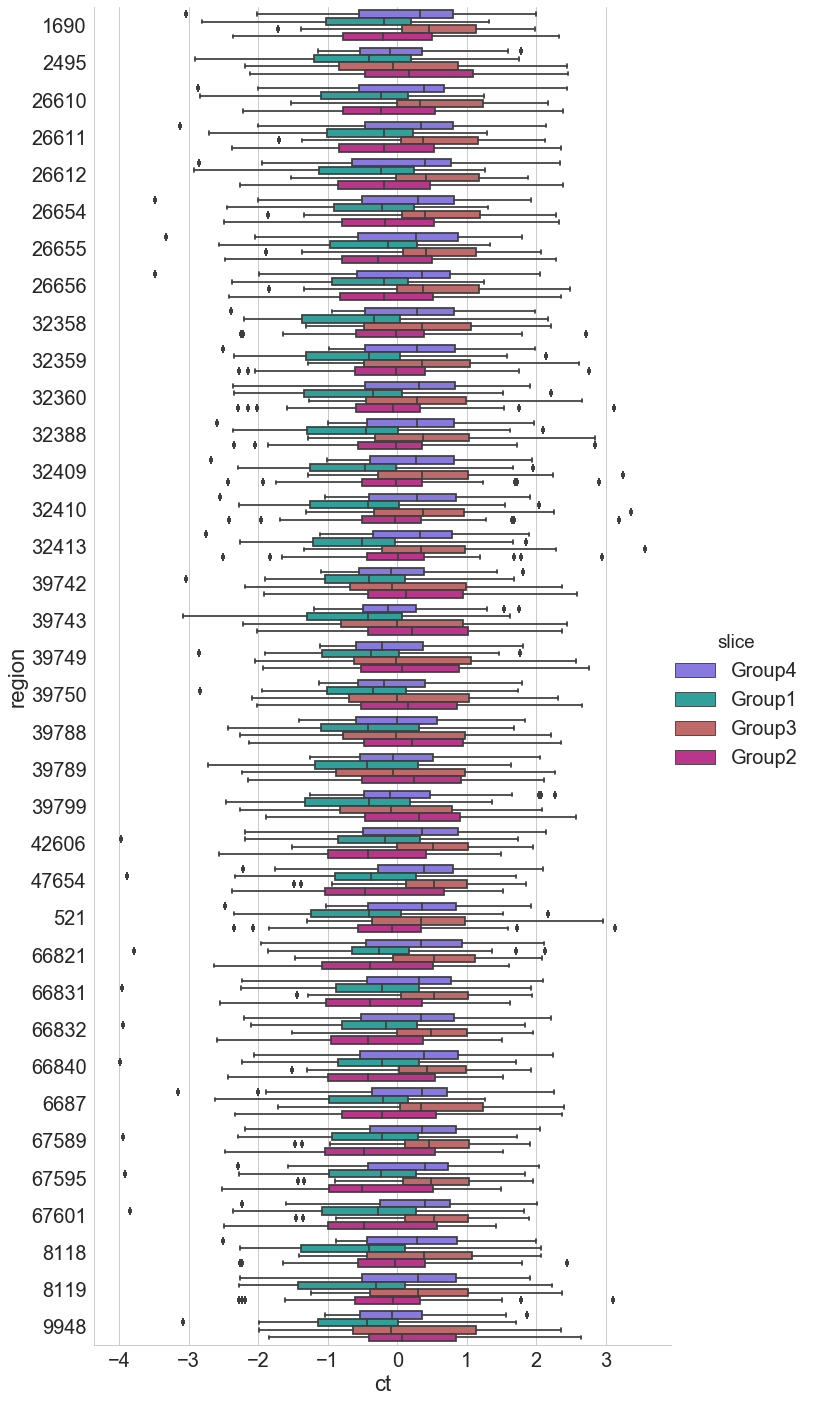

In [31]:
# not zscored
# sliced_dfs = {'Group1':labeledCT[labeledCT['Group']==1][['subjectid',
#         u'48982', u'48992', u'42981', u'72971', u'72972', u'72936',u'9966', u'39813', u'72910',u'67913', u'47732', u'67916', u'67927', u'47735',u'67925', u'67914', u'67911',u'69118', u'69117', u'69123', u'42712', u'68604', u'68594', u'68595',u'68593', u'68603', u'69114',u'67911', u'47733', u'67915', u'67917', u'67916',u'26469', u'47732', u'6649']],
#               'Group2':labeledCT[labeledCT['Group']==2][['subjectid',
#         u'48982', u'48992', u'42981', u'72971', u'72972', u'72936',u'9966', u'39813', u'72910',u'67913', u'47732', u'67916', u'67927', u'47735',u'67925', u'67914', u'67911',u'69118', u'69117', u'69123', u'42712', u'68604', u'68594', u'68595',u'68593', u'68603', u'69114',u'67911', u'47733', u'67915', u'67917', u'67916',u'26469', u'47732', u'6649']], 
#               'Group3':labeledCT[labeledCT['Group']==3][['subjectid',
#         u'48982', u'48992', u'42981', u'72971', u'72972', u'72936',u'9966', u'39813', u'72910',u'67913', u'47732', u'67916', u'67927', u'47735',u'67925', u'67914', u'67911',u'69118', u'69117', u'69123', u'42712', u'68604', u'68594', u'68595',u'68593', u'68603', u'69114',u'67911', u'47733', u'67915', u'67917', u'67916',u'26469', u'47732', u'6649']],
#              'Group4':labeledCT[labeledCT['Group']==4][['subjectid',
#         u'48982', u'48992', u'42981', u'72971', u'72972', u'72936',u'9966', u'39813', u'72910',u'67913', u'47732', u'67916', u'67927', u'47735',u'67925', u'67914', u'67911',u'69118', u'69117', u'69123', u'42712', u'68604', u'68594', u'68595',u'68593', u'68603', u'69114',u'67911', u'47733', u'67915', u'67917', u'67916',u'26469', u'47732', u'6649']]}

#zscored
sliced_dfs = {'Group1':labeledCT[labeledCT['Group']==1][['subjectid',
        u'39750', u'2495', u'39742', u'39743', u'39749', u'39788', u'39789', u'9948', u'39799', u'26611', u'6687', u'26654', u'26656', u'26612', u'1690', u'26655', u'26610', u'32413', u'32359', u'32358', u'32360', u'521', u'32388', u'32410', u'8119', u'32409', u'8118', u'47654', u'42606', u'67601', u'67595', u'67589', u'66831', u'66840', u'66821', u'66832']],
              'Group2':labeledCT[labeledCT['Group']==2][['subjectid',
        u'39750', u'2495', u'39742', u'39743', u'39749', u'39788', u'39789', u'9948', u'39799', u'26611', u'6687', u'26654', u'26656', u'26612', u'1690', u'26655', u'26610', u'32413', u'32359', u'32358', u'32360', u'521', u'32388', u'32410', u'8119', u'32409', u'8118', u'47654', u'42606', u'67601', u'67595', u'67589', u'66831', u'66840', u'66821', u'66832']], 
              'Group3':labeledCT[labeledCT['Group']==3][['subjectid',
        u'39750', u'2495', u'39742', u'39743', u'39749', u'39788', u'39789', u'9948', u'39799', u'26611', u'6687', u'26654', u'26656', u'26612', u'1690', u'26655', u'26610', u'32413', u'32359', u'32358', u'32360', u'521', u'32388', u'32410', u'8119', u'32409', u'8118', u'47654', u'42606', u'67601', u'67595', u'67589', u'66831', u'66840', u'66821', u'66832']],
             'Group4':labeledCT[labeledCT['Group']==4][['subjectid',
        u'39750', u'2495', u'39742', u'39743', u'39749', u'39788', u'39789', u'9948', u'39799', u'26611', u'6687', u'26654', u'26656', u'26612', u'1690', u'26655', u'26610', u'32413', u'32359', u'32358', u'32360', u'521', u'32388', u'32410', u'8119', u'32409', u'8118', u'47654', u'42606', u'67601', u'67595', u'67589', u'66831', u'66840', u'66821', u'66832']]}

plot_df = pd.DataFrame()
for key in sliced_dfs.keys():
    sliced_df = sliced_dfs[key]
    for col in sliced_df.columns:
        sliced_df_melt = pd.melt(sliced_df, id_vars=['subjectid'],value_vars=list(sliced_df.columns).remove('subjectid'),
                                 var_name='region',value_name='ct')
        sliced_df_melt['slice'] = np.tile(key,len(sliced_df_melt))
        
        plot_df = plot_df.append(sliced_df_melt)
        
sns.set(font_scale=2)
with sns.axes_style("whitegrid"):
    g = sns.factorplot(x='ct',y='region',hue='slice', palette=['#7b68ee', '#20b2aa', '#cd5c5c','#d02090'], data=plot_df, kind='box',size=20,ci=None,aspect=0.5,orient="h")
    
plt.show()